In [10]:
# anilkumar.ganesh@wipro.com
import sklearn
# Import all of the scikit learn stuff
#from __future__ import print_function
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import Normalizer
from sklearn import metrics
from sklearn.cluster import KMeans, MiniBatchKMeans
import pandas as pd
import warnings
# Suppress warnings from pandas library
warnings.filterwarnings("ignore", category=DeprecationWarning, module="pandas", lineno=570)

import numpy
import numpy as np
# anilkumar.ganesh@wipro.com
import sklearn
# Import all of the scikit learn stuff
#from __future__ import print_function
from sklearn.decomposition import TruncatedSVD

In [43]:
#wordnet_lemmatizer = WordNetLemmatizer()
all_files=['NLPdataEX7_doc1.txt','NLPdataEX7_doc3.txt','NLPdataEX7_doc4.txt','NLPdataEX7_doc5.txt','NLPdataEX7_doc6.txt','NLPdataEX7_doc7.txt','NLPdataEX7_doc8.txt']
column_names=['NLPdataEX7_doc1','NLPdataEX7_doc3','NLPdataEX7_doc4','NLPdataEX7_doc5','NLPdataEX7_doc6','NLPdataEX7_doc7','NLPdataEX7_doc8']
words=[]
for file in all_files:
    words += open(file) 


In [44]:
vectorizer = CountVectorizer(min_df = 1, stop_words = 'english')
vectorizer

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words='english',
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [45]:

vectorizer = CountVectorizer(min_df = 1, stop_words = 'english')
vectorizer
#dtm = vectorizer.fit_transform(example)
#print(pd.DataFrame(dtm.toarray(),index=example,columns=vectorizer.get_feature_names()).head(10))



CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words='english',
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [46]:
dtm = vectorizer.fit_transform(words)
#print(pd.DataFrame(dtm.toarray(),index=example,columns=vectorizer.get_feature_names()).head())
dtm

<7x376 sparse matrix of type '<class 'numpy.int64'>'
	with 399 stored elements in Compressed Sparse Row format>

In [47]:
print(pd.DataFrame(dtm.toarray(),index=column_names,columns=vectorizer.get_feature_names()))

                 12  2014  300  330  37  according  active  addition  adults  \
NLPdataEX7_doc1   0     0    0    0   1          0       0         0       0   
NLPdataEX7_doc3   0     0    0    0   0          0       0         0       0   
NLPdataEX7_doc4   0     1    0    0   0          0       0         2       0   
NLPdataEX7_doc5   0     0    1    1   0          1       1         0       0   
NLPdataEX7_doc6   1     0    0    0   0          0       0         0       0   
NLPdataEX7_doc7   0     0    0    0   0          0       0         0       0   
NLPdataEX7_doc8   0     0    0    0   0          0       0         0       1   

                 agency  ...    weight  white  wide  won  work  worked  world  \
NLPdataEX7_doc1       0  ...         0      0     0    0     0       0      0   
NLPdataEX7_doc3       0  ...         1      0     0    0     0       0      0   
NLPdataEX7_doc4       0  ...         0      0     0    0     1       1      1   
NLPdataEX7_doc5       1  ...       

In [48]:
# Get words that correspond to each column
vectorizer.get_feature_names()


['12',
 '2014',
 '300',
 '330',
 '37',
 'according',
 'active',
 'addition',
 'adults',
 'agency',
 'ago',
 'agriculture',
 'air',
 'allegations',
 'alliance',
 'announced',
 'answers',
 'areas',
 'argues',
 'assailed',
 'astronauts',
 'athletics',
 'attempted',
 'base',
 'based',
 'battery',
 'begin',
 'behalf',
 'beneath',
 'billions',
 'board',
 'box',
 'bring',
 'broken',
 'brought',
 'busy',
 'buzz',
 'cabinet',
 'called',
 'calling',
 'candidate',
 'car',
 'cargo',
 'cars',
 'cases',
 'cave',
 'caves',
 'challenges',
 'chamber',
 'channels',
 'chasm',
 'chevrolet',
 'child',
 'china',
 'closes',
 'collapsed',
 'college',
 'colony',
 'comfortably',
 'comment',
 'communities',
 'compared',
 'compartment',
 'compartments',
 'composed',
 'concept',
 'cone',
 'configuration',
 'constantly',
 'contains',
 'convenient',
 'converted',
 'corvair',
 'dangers',
 'data',
 'dauphine',
 'day',
 'dec',
 'decades',
 'defended',
 'democratic',
 'deputy',
 'devices',
 'difficult',
 'dimensions',
 

In [49]:
# Fit LSA. Use algorithm = “randomized” for large datasets arpack
lsa = TruncatedSVD(4, algorithm = 'randomized') 
dtm_lsa = lsa.fit_transform(dtm)
dtm_lsa = Normalizer(copy=False).fit_transform(dtm_lsa)


In [50]:
print(dtm_lsa)

[[ 0.11836503  0.74405185 -0.63093132  0.18520861]
 [ 0.20260486  0.90056809 -0.37569737  0.08233994]
 [ 0.85035748 -0.01665653 -0.52181565  0.06575068]
 [ 0.72810732 -0.05447154  0.67503745 -0.10591044]
 [ 0.02019784 -0.00190256  0.15808672  0.9872168 ]
 [ 0.2271776   0.18437698  0.17252482  0.94054806]
 [ 0.05058507  0.99837785  0.02584403 -0.00385975]]


In [51]:
print(pd.DataFrame(lsa.components_,index = ["component_1","component_2",'component_3','component_4'],columns = vectorizer.get_feature_names()))
print(pd.DataFrame(dtm_lsa, index=column_names, columns = ["component_1","component_2",'component_3','component_4']))




                   12      2014       300       330        37  according  \
component_1  0.001073  0.057051  0.046244  0.046244  0.000044   0.046244   
component_2 -0.000125 -0.001377 -0.004263 -0.004263  0.000338  -0.004263   
component_3  0.014469 -0.060298  0.073844  0.073844 -0.000401   0.073844   
component_4  0.100137  0.008420 -0.012839 -0.012839  0.000130  -0.012839   

               active  addition    adults    agency    ...       weight  \
component_1  0.046244  0.114101  0.003348  0.046244    ...     0.000649   
component_2 -0.004263 -0.002754  0.081413 -0.004263    ...     0.003553   
component_3  0.073844 -0.120596  0.002946  0.073844    ...    -0.002072   
component_4 -0.012839  0.016840 -0.000488 -0.012839    ...     0.000503   

                white      wide       won      work    worked     world  \
component_1  0.001073  0.046244  0.001073  0.057051  0.057051  0.057051   
component_2 -0.000125 -0.004263 -0.000125 -0.001377 -0.001377 -0.001377   
component_3  0.014

In [52]:
xs = [w[0] for w in dtm_lsa]
ys = [w[1] for w in dtm_lsa]
print (xs, ys) 

[0.11836502758391529, 0.20260485998381583, 0.85035747511943183, 0.72810732324798322, 0.020197839290518365, 0.22717759730280707, 0.050585071066453324] [0.74405185196143464, 0.90056809463233489, -0.016656532315930221, -0.054471535552027078, -0.0019025553241178083, 0.18437698333142755, 0.99837785390585843]


In [53]:

# Compute document similarity using LSA components
similarity = np.asarray(numpy.asmatrix(dtm_lsa) * numpy.asmatrix(dtm_lsa).T)
print (pd.DataFrame(similarity,index=column_names, columns=column_names).head(10))


                 NLPdataEX7_doc1  NLPdataEX7_doc3  NLPdataEX7_doc4  \
NLPdataEX7_doc1         1.000000         0.946340         0.429667   
NLPdataEX7_doc3         0.946340         1.000000         0.358745   
NLPdataEX7_doc4         0.429667         0.358745         1.000000   
NLPdataEX7_doc5        -0.399865        -0.163868         0.260850   
NLPdataEX7_doc6         0.084074         0.024273        -0.000375   
NLPdataEX7_doc7         0.229422         0.224699         0.161927   
NLPdataEX7_doc8         0.731812         0.899329         0.012646   

                 NLPdataEX7_doc5  NLPdataEX7_doc6  NLPdataEX7_doc7  \
NLPdataEX7_doc1        -0.399865         0.084074         0.229422   
NLPdataEX7_doc3        -0.163868         0.024273         0.224699   
NLPdataEX7_doc4         0.260850        -0.000375         0.161927   
NLPdataEX7_doc5         1.000000         0.016968         0.172213   
NLPdataEX7_doc6         0.016968         1.000000         0.960036   
NLPdataEX7_doc7    

In [54]:

#%pylab inline
import pylab
pylab.interactive(True)

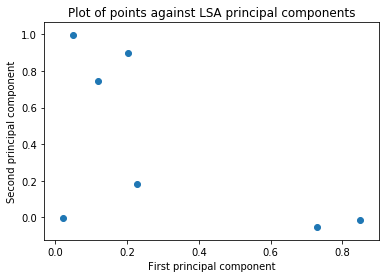

In [55]:
import matplotlib.pyplot as plt
plt.figure(1)
plt.scatter(xs,ys)
plt.xlabel('First principal component')
plt.ylabel('Second principal component')
plt.title('Plot of points against LSA principal components')
plt.show(1)


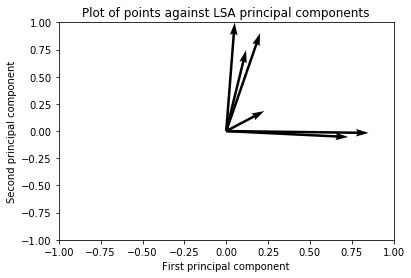

In [56]:
plt.figure(2)
ax = plt.gca()
ax.quiver(0,0,xs,ys,angles='xy',scale_units='xy',scale=1, linewidth = .01)
ax.set_xlim([-1,1])
ax.set_ylim([-1,1])
plt.xlabel('First principal component')
plt.ylabel('Second principal component')
plt.title('Plot of points against LSA principal components')
plt.show(2)
